In [1]:
#! pip install geopandas
#! pip install pandas_profiling

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import textwrap
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [3]:
covid19_df = pd.read_csv('datasets/covid19datasets.csv')
covid19_df.head(5)

Date Location ISO Code     Location  New Cases  New Deaths  \
0  3/1/2020             ID-JK  DKI Jakarta          2           0   
1  3/2/2020             ID-JK  DKI Jakarta          2           0   
2  3/2/2020               IDN    Indonesia          2           0   
3  3/2/2020             ID-JB   Jawa Barat          3           0   
4  3/3/2020             ID-JK  DKI Jakarta          2           0   

   New Recovered  New Active Cases  Total Cases  Total Deaths  \
0              0                 2          489            20   
1              0                 2          491            20   
2              0                 2            2             0   
3              0                 3           12             5   
4              0                 2          493            20   

   Total Recovered  ...   Longitude  Latitude  New Cases per Million  \
0               39  ...  106.836118 -6.204699                   0.18   
1               39  ...  106.836118 -6.204699                   0.18   
2                0  ...  113.921327 -0.789275                   0.01   
3                4  ...  107.603708 -6.920432                   0.07   
4               39  ...  106.836118 -6.204699                   0.18   

  Total Cases per Million New Deaths per Million Total Deaths per Million  \
0                   45.09                    0.0                     1.84   
1                   45.27                    0.0                     1.84   
2                    0.01                    0.0                     0.00   
3                    0.27                    0.0                     0.11   
4                   45.45                    0.0                     1.84   

  Case Fatality Rate Case Recovered Rate Growth Factor of New Cases  \
0              4.09%               7.98%                        NaN   
1              4.07%               7.94%                        1.0   
2              0.00%               0.00%                        NaN   
3             41.67%              33.33%                        NaN   
4              4.06%               7.91%                        1.0   

   Growth Factor of New Deaths  
0                          NaN  
1                          1.0  
2                          NaN  
3                          NaN  
4                          1.0  

[5 rows x 37 columns]

In [4]:
covid19_df.info()
covid19_df[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7797 entries, 0 to 7796
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         7797 non-null   object 
 1   Location ISO Code            7797 non-null   object 
 2   Location                     7797 non-null   object 
 3   New Cases                    7797 non-null   int64  
 4   New Deaths                   7797 non-null   int64  
 5   New Recovered                7797 non-null   int64  
 6   New Active Cases             7797 non-null   int64  
 7   Total Cases                  7797 non-null   int64  
 8   Total Deaths                 7797 non-null   int64  
 9   Total Recovered              7797 non-null   int64  
 10  Total Active Cases           7797 non-null   int64  
 11  Location Level               7797 non-null   object 
 12  City or Regency              0 non-null      float64
 13  Province          

Date Location ISO Code     Location  New Cases  New Deaths  \
0  3/1/2020             ID-JK  DKI Jakarta          2           0   
1  3/2/2020             ID-JK  DKI Jakarta          2           0   
2  3/2/2020               IDN    Indonesia          2           0   
3  3/2/2020             ID-JB   Jawa Barat          3           0   
4  3/3/2020             ID-JK  DKI Jakarta          2           0   
5  3/3/2020               IDN    Indonesia          0           0   
6  3/3/2020             ID-JB   Jawa Barat          1           1   
7  3/4/2020             ID-JK  DKI Jakarta          2           0   
8  3/4/2020               IDN    Indonesia          0           0   
9  3/4/2020             ID-JB   Jawa Barat          1           0   

   New Recovered  New Active Cases  Total Cases  Total Deaths  \
0              0                 2          489            20   
1              0                 2          491            20   
2              0                 2            2             0   
3              0                 3           12             5   
4              0                 2          493            20   
5              0                 0            2             0   
6              0                 0           13             6   
7              0                 2          495            20   
8              0                 0            2             0   
9              0                 1           14             6   

   Total Recovered  ...   Longitude  Latitude  New Cases per Million  \
0               39  ...  106.836118 -6.204699                   0.18   
1               39  ...  106.836118 -6.204699                   0.18   
2                0  ...  113.921327 -0.789275                   0.01   
3                4  ...  107.603708 -6.920432                   0.07   
4               39  ...  106.836118 -6.204699                   0.18   
5                0  ...  113.921327 -0.789275                   0.00   
6                4  ...  107.603708 -6.920432                   0.02   
7               39  ...  106.836118 -6.204699                   0.18   
8                0  ...  113.921327 -0.789275                   0.00   
9                4  ...  107.603708 -6.920432                   0.02   

  Total Cases per Million New Deaths per Million Total Deaths per Million  \
0                   45.09                   0.00                     1.84   
1                   45.27                   0.00                     1.84   
2                    0.01                   0.00                     0.00   
3                    0.27                   0.00                     0.11   
4                   45.45                   0.00                     1.84   
5                    0.01                   0.00                     0.00   
6                    0.29                   0.02                     0.13   
7                   45.64                   0.00                     1.84   
8                    0.01                   0.00                     0.00   
9                    0.31                   0.00                     0.13   

  Case Fatality Rate Case Recovered Rate Growth Factor of New Cases  \
0              4.09%               7.98%                        NaN   
1              4.07%               7.94%                       1.00   
2              0.00%               0.00%                        NaN   
3             41.67%              33.33%                        NaN   
4              4.06%               7.91%                       1.00   
5              0.00%               0.00%                       0.00   
6             46.15%              30.77%                       0.33   
7              4.04%               7.88%                       1.00   
8              0.00%               0.00%                       1.00   
9             42.86%              28.57%                       1.00   

   Growth Factor of New Deaths  
0                          NaN  
1                          1.0  
2        

copy dataset

In [5]:
covid_new = covid19_df.copy()
covid_new.head(5)

Date Location ISO Code     Location  New Cases  New Deaths  \
0  3/1/2020             ID-JK  DKI Jakarta          2           0   
1  3/2/2020             ID-JK  DKI Jakarta          2           0   
2  3/2/2020               IDN    Indonesia          2           0   
3  3/2/2020             ID-JB   Jawa Barat          3           0   
4  3/3/2020             ID-JK  DKI Jakarta          2           0   

   New Recovered  New Active Cases  Total Cases  Total Deaths  \
0              0                 2          489            20   
1              0                 2          491            20   
2              0                 2            2             0   
3              0                 3           12             5   
4              0                 2          493            20   

   Total Recovered  ...   Longitude  Latitude  New Cases per Million  \
0               39  ...  106.836118 -6.204699                   0.18   
1               39  ...  106.836118 -6.204699                   0.18   
2                0  ...  113.921327 -0.789275                   0.01   
3                4  ...  107.603708 -6.920432                   0.07   
4               39  ...  106.836118 -6.204699                   0.18   

  Total Cases per Million New Deaths per Million Total Deaths per Million  \
0                   45.09                    0.0                     1.84   
1                   45.27                    0.0                     1.84   
2                    0.01                    0.0                     0.00   
3                    0.27                    0.0                     0.11   
4                   45.45                    0.0                     1.84   

  Case Fatality Rate Case Recovered Rate Growth Factor of New Cases  \
0              4.09%               7.98%                        NaN   
1              4.07%               7.94%                        1.0   
2              0.00%               0.00%                        NaN   
3             41.67%              33.33%                        NaN   
4              4.06%               7.91%                        1.0   

   Growth Factor of New Deaths  
0                          NaN  
1                          1.0  
2                          NaN  
3                          NaN  
4                          1.0  

[5 rows x 37 columns]

melakukan drop kolom yang tidak berguna

In [6]:
covid_new.drop(["Location ISO Code", "New Cases", "New Deaths", "New Recovered", "New Active Cases", "Province", "Country", "Continent", "Island", "Time Zone", 
                "Special Status", "Total Regencies", "Total Cities", "Total Districts", "Total Urban Villages", "Total Rural Villages", "Area (km2)", 
                "New Cases per Million", "Total Cases per Million","New Deaths per Million", "Total Deaths per Million", "Case Fatality Rate",
                "Case Recovered Rate", "Growth Factor of New Cases","Growth Factor of New Deaths", "City or Regency", "Longitude", "Latitude"],axis=1,inplace=True)

In [7]:
covid_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7797 entries, 0 to 7796
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                7797 non-null   object 
 1   Location            7797 non-null   object 
 2   Total Cases         7797 non-null   int64  
 3   Total Deaths        7797 non-null   int64  
 4   Total Recovered     7797 non-null   int64  
 5   Total Active Cases  7797 non-null   int64  
 6   Location Level      7797 non-null   object 
 7   Population          7797 non-null   int64  
 8   Population Density  7797 non-null   float64
dtypes: float64(1), int64(5), object(3)
memory usage: 548.4+ KB


drop data yang double pada kolom Location untuk mendapat update terakhir

In [8]:
covid_final = covid_new.drop_duplicates(subset='Location', keep="last")
covid_final

Date                    Location  Total Cases  Total Deaths  \
7762  10/31/2020                        Aceh         7405           270   
7763  10/31/2020                        Bali        11764           387   
7764  10/31/2020                      Banten         9490           269   
7765  10/31/2020                    Bengkulu         1081            50   
7766  10/31/2020                 DKI Jakarta       105597          2251   
7767  10/31/2020  Daerah Istimewa Yogyakarta         3835            93   
7768  10/31/2020                   Gorontalo         3017            85   
7769  10/31/2020                   Indonesia       410088         13869   
7770  10/31/2020                       Jambi         1230            23   
7771  10/31/2020                  Jawa Barat        36338           719   
7772  10/31/2020                 Jawa Tengah        33912          1745   
7773  10/31/2020                  Jawa Timur        52465          3768   
7774  10/31/2020            Kalimantan Barat         1655            20   
7775  10/31/2020          Kalimantan Selatan        11856           485   
7776  10/31/2020           Kalimantan Tengah         4344           151   
7777  10/31/2020            Kalimantan Timur        14091           482   
7778  10/31/2020            Kalimantan Utara          822             7   
7779  10/31/2020   Kepulauan Bangka Belitung          583             7   
7780  10/31/2020              Kepulauan Riau         4008            94   
7781  10/31/2020                     Lampung         1825            76   
7782  10/31/2020                      Maluku         3852            47   
7783  10/31/2020                Maluku Utara         2199            75   
7784  10/31/2020         Nusa Tenggara Barat         3972           221   
7785  10/31/2020         Nusa Tenggara Timur          681             7   
7786  10/31/2020                       Papua         9037           129   
7787  10/31/2020                 Papua Barat         4149            65   
7788  10/31/2020                        Riau        14799           336   
7789  10/31/2020              Sulawesi Barat         1029            14   
7790  10/31/2020            Sulawesi Selatan        18345           467   
7791  10/31/2020             Sulawesi Tengah          857            34   
7792  10/31/2020           Sulawesi Tenggara         4950            82   
7793  10/31/2020              Sulawesi Utara         5407           204   
7794  10/31/2020              Sumatera Barat        14537           260   
7795  10/31/2020            Sumatera Selatan         7849           413   
7796  10/31/2020              Sumatera Utara        13107           534   

      Total Recovered  Total Active Cases Location Level  Population  \
7762             5037                2098       Province     5247257   
7763            10624                 753       Province     4216171   
7764             7422                1799       Province    10722374   
7765              803                 228       Province     1999539   
7766            93251               10095       Province    10846145   
7767             3147                 595       Province     3631015   
7768             2857                  75       Province     1180651   
7769           337801               58418        Country   265185520   
7770              631                 576       Province     3493357   
7771            25644                9975       Province    45161325   
7772            28094                4073       Province    36364072   
7773            46378                2319       Province    40479023   
7774             1338                 297       Province     5422814   
7775            10773                 598       Province     4023049   
7776             3880                 313       Province     2570289   
7777            11066                2543       Province     3552191   
7778              701                 114       Province      648407   
7779           

In [9]:
prov = gpd.read_file('datasets/SHP Indonesia/prov.shp')
prov.drop(["NAME_0"],axis=1,inplace=True)
prov.rename(columns = {"NAME_1":"Provinsi"}, inplace = True)
prov['Provinsi'].replace({"Jakarta Raya":"DKI Jakarta","Yogyakarta":"Daerah Istimewa Yogyakarta"},inplace=True)

mengganti nama kolom Location menjadi Provinsi

In [10]:
covid_final.rename(columns={
    'Location':'Provinsi'
},inplace=True)
covid_final

/home/anz007/apps/miniconda3/envs/ikh315/lib/python3.7/site-packages/pandas/core/frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Date                    Provinsi  Total Cases  Total Deaths  \
7762  10/31/2020                        Aceh         7405           270   
7763  10/31/2020                        Bali        11764           387   
7764  10/31/2020                      Banten         9490           269   
7765  10/31/2020                    Bengkulu         1081            50   
7766  10/31/2020                 DKI Jakarta       105597          2251   
7767  10/31/2020  Daerah Istimewa Yogyakarta         3835            93   
7768  10/31/2020                   Gorontalo         3017            85   
7769  10/31/2020                   Indonesia       410088         13869   
7770  10/31/2020                       Jambi         1230            23   
7771  10/31/2020                  Jawa Barat        36338           719   
7772  10/31/2020                 Jawa Tengah        33912          1745   
7773  10/31/2020                  Jawa Timur        52465          3768   
7774  10/31/2020            Kalimantan Barat         1655            20   
7775  10/31/2020          Kalimantan Selatan        11856           485   
7776  10/31/2020           Kalimantan Tengah         4344           151   
7777  10/31/2020            Kalimantan Timur        14091           482   
7778  10/31/2020            Kalimantan Utara          822             7   
7779  10/31/2020   Kepulauan Bangka Belitung          583             7   
7780  10/31/2020              Kepulauan Riau         4008            94   
7781  10/31/2020                     Lampung         1825            76   
7782  10/31/2020                      Maluku         3852            47   
7783  10/31/2020                Maluku Utara         2199            75   
7784  10/31/2020         Nusa Tenggara Barat         3972           221   
7785  10/31/2020         Nusa Tenggara Timur          681             7   
7786  10/31/2020                       Papua         9037           129   
7787  10/31/2020                 Papua Barat         4149            65   
7788  10/31/2020                        Riau        14799           336   
7789  10/31/2020              Sulawesi Barat         1029            14   
7790  10/31/2020            Sulawesi Selatan        18345           467   
7791  10/31/2020             Sulawesi Tengah          857            34   
7792  10/31/2020           Sulawesi Tenggara         4950            82   
7793  10/31/2020              Sulawesi Utara         5407           204   
7794  10/31/2020              Sumatera Barat        14537           260   
7795  10/31/2020            Sumatera Selatan         7849           413   
7796  10/31/2020              Sumatera Utara        13107           534   

      Total Recovered  Total Active Cases Location Level  Population  \
7762             5037                2098       Province     5247257   
7763            10624                 753       Province     4216171   
7764             7422                1799       Province    10722374   
7765              803                 228       Province     1999539   
7766            93251               10095       Province    10846145   
7767             3147                 595       Province     3631015   
7768             2857                  75       Province     1180651   
7769           337801               58418        Country   265185520   
7770              631                 576       Province     3493357   
7771            25644                9975       Province    45161325   
7772            28094                4073       Province    36364072   
7773            46378                2319       Province    40479023   
7774             1338                 297       Province     5422814   
7775            10773                 598       Province     4023049   
7776             3880                 313       Province     2570289   
7777            11066                2543       Province     3552191   
7778              701                 114       Province      648407   
7779           

menghilangkan data Indonesia

In [11]:
covid_final2 = covid_final.drop([7769])
covid_final2

Date                    Provinsi  Total Cases  Total Deaths  \
7762  10/31/2020                        Aceh         7405           270   
7763  10/31/2020                        Bali        11764           387   
7764  10/31/2020                      Banten         9490           269   
7765  10/31/2020                    Bengkulu         1081            50   
7766  10/31/2020                 DKI Jakarta       105597          2251   
7767  10/31/2020  Daerah Istimewa Yogyakarta         3835            93   
7768  10/31/2020                   Gorontalo         3017            85   
7770  10/31/2020                       Jambi         1230            23   
7771  10/31/2020                  Jawa Barat        36338           719   
7772  10/31/2020                 Jawa Tengah        33912          1745   
7773  10/31/2020                  Jawa Timur        52465          3768   
7774  10/31/2020            Kalimantan Barat         1655            20   
7775  10/31/2020          Kalimantan Selatan        11856           485   
7776  10/31/2020           Kalimantan Tengah         4344           151   
7777  10/31/2020            Kalimantan Timur        14091           482   
7778  10/31/2020            Kalimantan Utara          822             7   
7779  10/31/2020   Kepulauan Bangka Belitung          583             7   
7780  10/31/2020              Kepulauan Riau         4008            94   
7781  10/31/2020                     Lampung         1825            76   
7782  10/31/2020                      Maluku         3852            47   
7783  10/31/2020                Maluku Utara         2199            75   
7784  10/31/2020         Nusa Tenggara Barat         3972           221   
7785  10/31/2020         Nusa Tenggara Timur          681             7   
7786  10/31/2020                       Papua         9037           129   
7787  10/31/2020                 Papua Barat         4149            65   
7788  10/31/2020                        Riau        14799           336   
7789  10/31/2020              Sulawesi Barat         1029            14   
7790  10/31/2020            Sulawesi Selatan        18345           467   
7791  10/31/2020             Sulawesi Tengah          857            34   
7792  10/31/2020           Sulawesi Tenggara         4950            82   
7793  10/31/2020              Sulawesi Utara         5407           204   
7794  10/31/2020              Sumatera Barat        14537           260   
7795  10/31/2020            Sumatera Selatan         7849           413   
7796  10/31/2020              Sumatera Utara        13107           534   

      Total Recovered  Total Active Cases Location Level  Population  \
7762             5037                2098       Province     5247257   
7763            10624                 753       Province     4216171   
7764             7422                1799       Province    10722374   
7765              803                 228       Province     1999539   
7766            93251               10095       Province    10846145   
7767             3147                 595       Province     3631015   
7768             2857                  75       Province     1180651   
7770              631                 576       Province     3493357   
7771            25644                9975       Province    45161325   
7772            28094                4073       Province    36364072   
7773            46378                2319       Province    40479023   
7774             1338                 297       Province     5422814   
7775            10773                 598       Province     4023049   
7776             3880                 313       Province     2570289   
7777            11066                2543       Province     3552191   
7778              701                 114       Province      648407   
7779              524                  52       Province     1379767   
7780             2668                1246       Province     1929400   
7781             1

penggabungan 2 dataset

In [12]:
covid_peta = prov.merge(covid_final2.sort_values(by='Provinsi'),on='Provinsi')
covid_peta.head(5)

Provinsi  KODE                                           geometry  \
0         Gorontalo    75  MULTIPOLYGON (((122.81573 0.84676, 122.81579 0...   
1              Riau    14  MULTIPOLYGON (((101.64432 -0.82552, 101.64344 ...   
2       DKI Jakarta    31  MULTIPOLYGON (((106.73563 -6.04014, 106.73548 ...   
3    Kepulauan Riau    21  MULTIPOLYGON (((105.25355 -1.29511, 105.25032 ...   
4  Sulawesi Selatan    73  MULTIPOLYGON (((117.20354 -7.75841, 117.20369 ...   

         Date  Total Cases  Total Deaths  Total Recovered  Total Active Cases  \
0  10/31/2020         3017            85             2857                  75   
1  10/31/2020        14799           336            11162                3301   
2  10/31/2020       105597          2251            93251               10095   
3  10/31/2020         4008            94             2668                1246   
4  10/31/2020        18345           467            16444                1434   

  Location Level  Population  Population Density  
0       Province     1180651              104.88  
1       Province     6074100               69.80  
2       Province    10846145            16334.31  
3       Province     1929400              235.24  
4       Province     9426885              201.78

Pembuatan peta

Text(0.5, 0.98, 'Peta Covid-19 Indonesia')

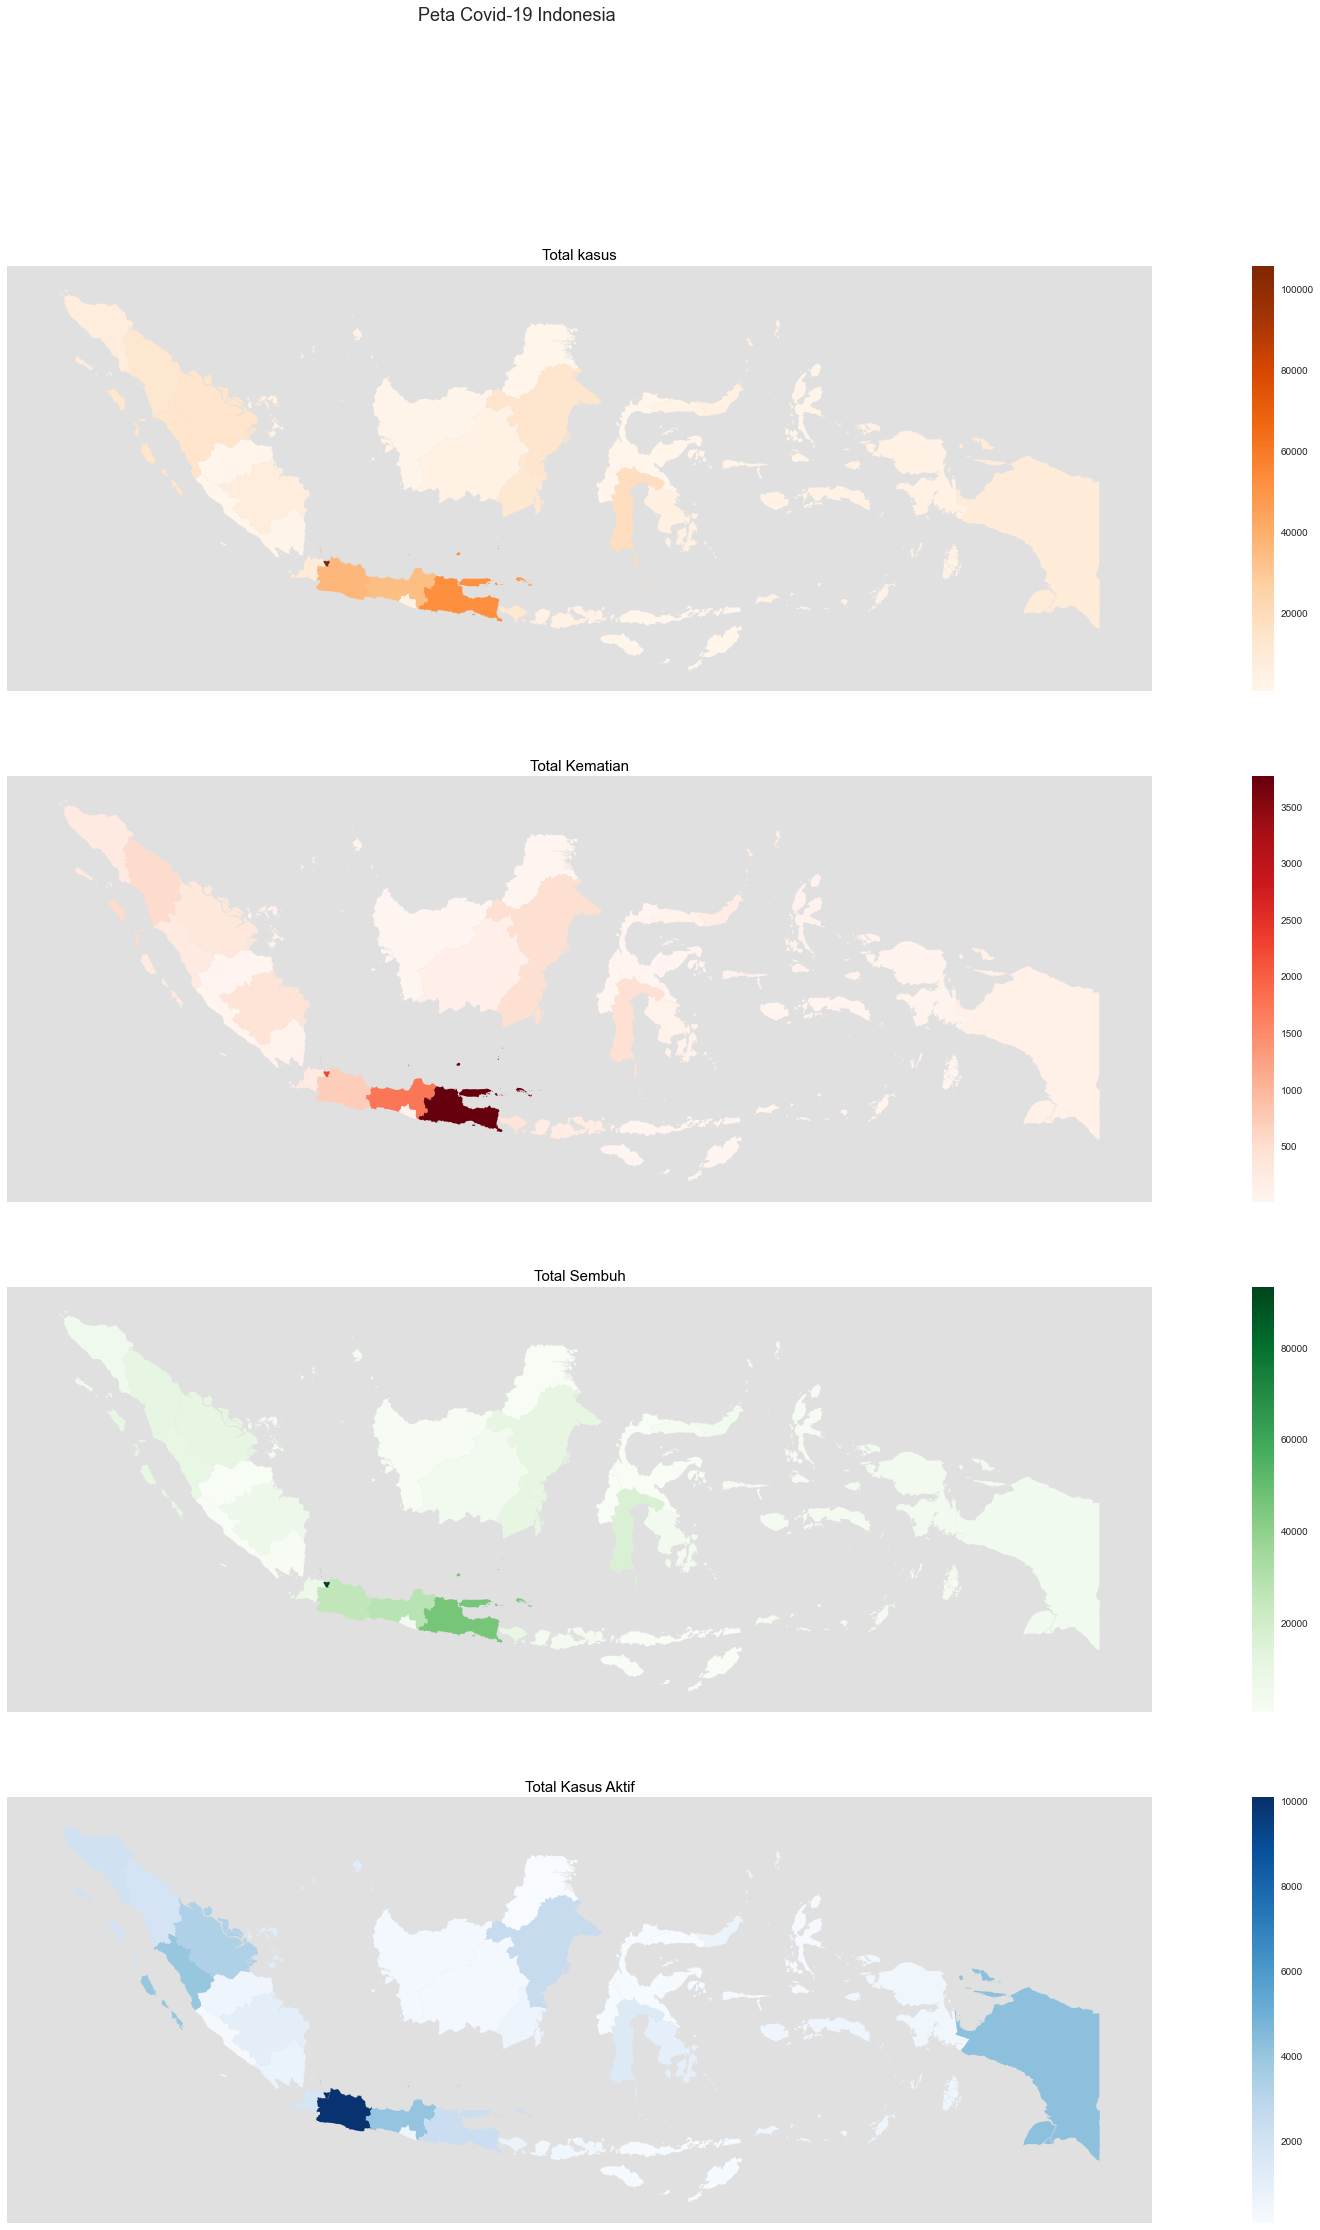

In [13]:
fig,ax = plt.subplots(4,figsize=(36,36))
plt.style.use('seaborn')
covid_peta.plot(column='Total Cases',cmap='Oranges',figsize=(9,36),legend=True,ax=ax[0])
ax[0].set_title('Total kasus',fontsize=15)
covid_peta.plot(column='Total Deaths',cmap='Reds',figsize=(9,36),legend=True,ax=ax[1])
ax[1].set_title('Total Kematian',fontsize=15)
covid_peta.plot(column='Total Recovered',cmap='Greens',figsize=(9,36),legend=True,ax=ax[2])
ax[2].set_title('Total Sembuh',fontsize=15)
covid_peta.plot(column='Total Active Cases',cmap='Blues',figsize=(9,36),legend=True,ax=ax[3])
ax[3].set_title('Total Kasus Aktif',fontsize=15)

#add background color
ax[0].set_facecolor('#e0e0e0')
ax[1].set_facecolor('#e0e0e0')
ax[2].set_facecolor('#e0e0e0')
ax[3].set_facecolor('#e0e0e0')

for i in np.arange(4):
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    for item in ax[i].get_xticklabels():
        item.set_visible(False)
    for item in ax[i].get_yticklabels():
        item.set_visible(False) 
    ax[i].set_xticks([]) 
    ax[i].set_yticks([]) 
fig.suptitle('Peta Covid-19 Indonesia', fontsize=18)

melihat keterhubungan antar kolom table covid

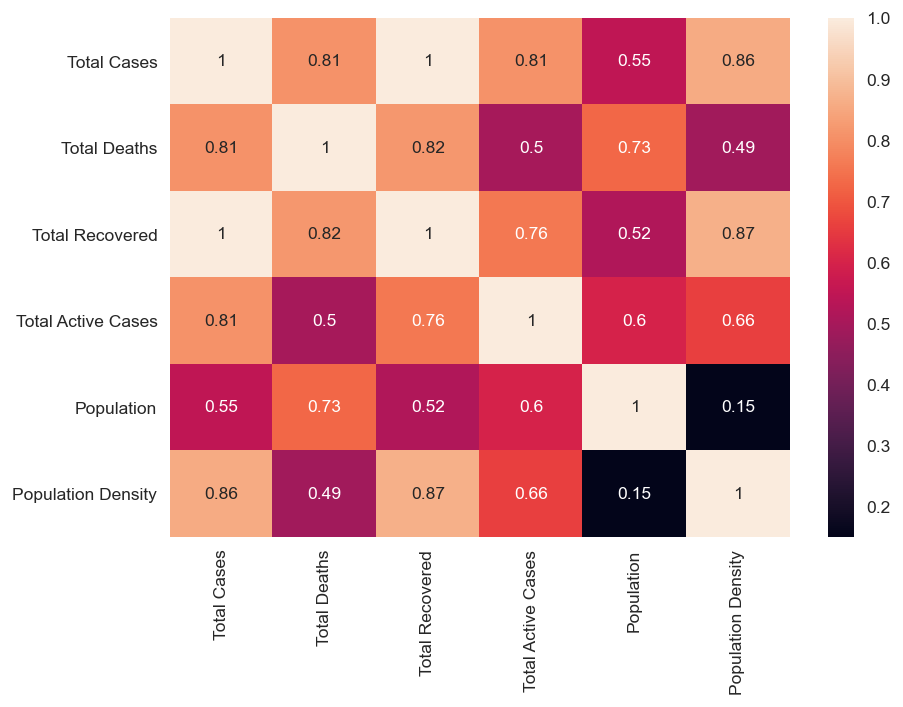

In [14]:
plt.figure(dpi=125)
sns.heatmap(np.round(covid_final2.corr(),2),annot = True)
plt.show()

dari data diatas dapat dilihat bahwah kolom Total Cases dan Population memiliki kolerasi yang cukup tinggi

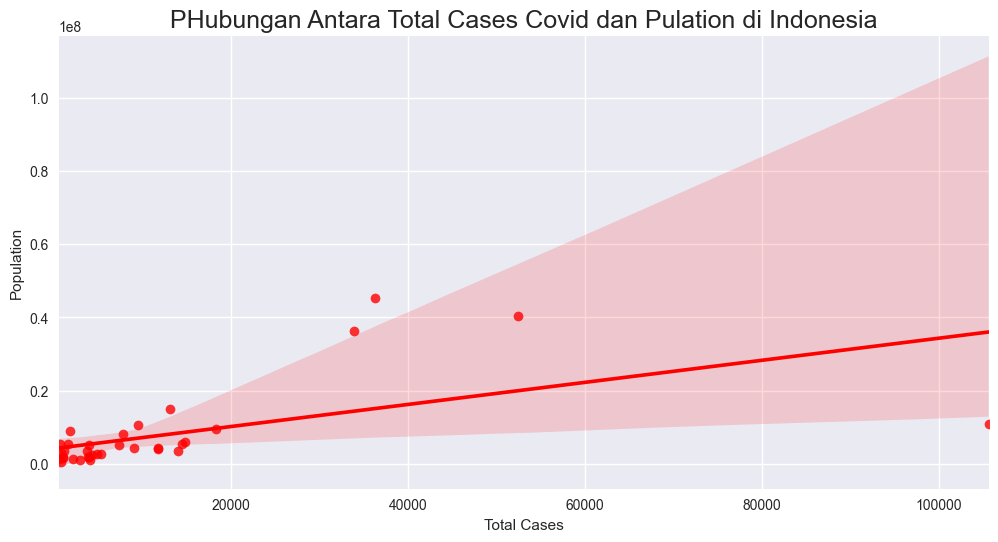

In [15]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Total Cases',y='Population',data=covid_final2,color='Red')
plt.xlabel('Total Cases')
plt.ylabel('Population')
plt.title('PHubungan Antara Total Cases Covid dan Pulation di Indonesia',fontsize = 18)
plt.show()

/home/anz007/apps/miniconda3/envs/ikh315/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


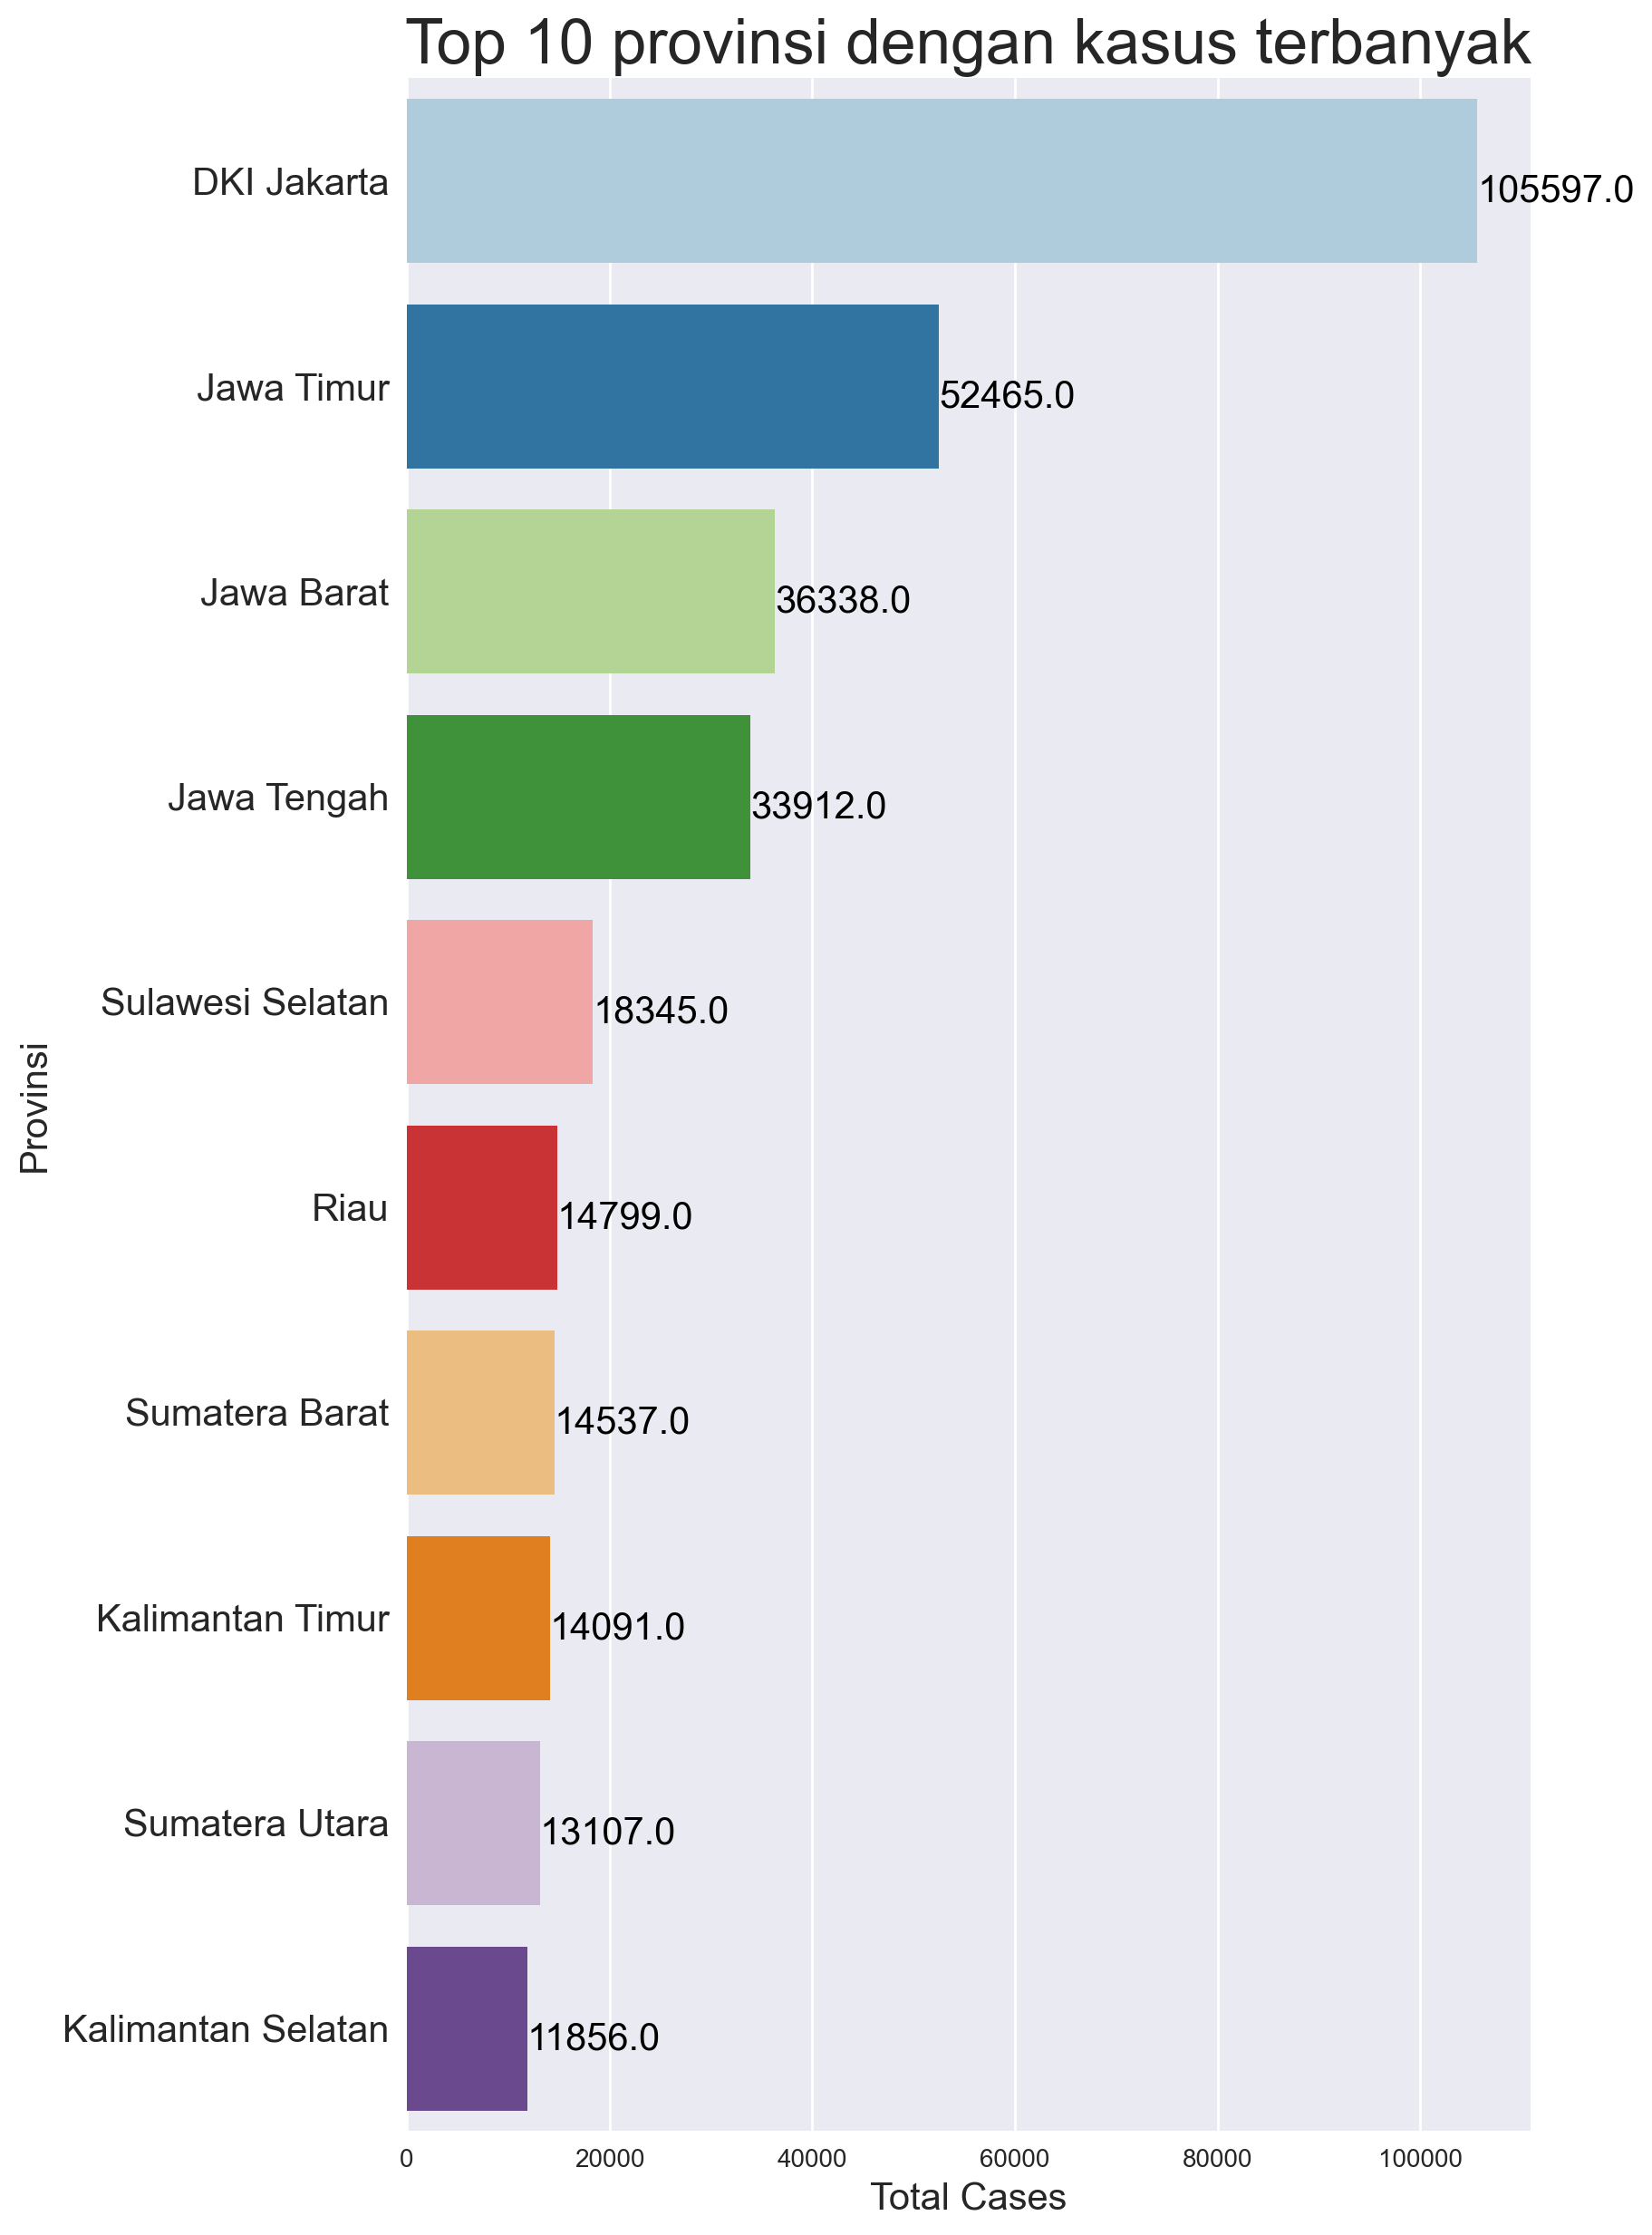

In [16]:
total_cases = covid_peta.sort_values(by=['Total Cases'], ascending=False)
total_cases = total_cases[0:10]
plt.figure(figsize=(8,15),dpi=200)
ax = sns.barplot(total_cases['Total Cases'], total_cases['Provinsi'],palette='Paired')
plt.xlabel("Total Cases",fontsize = 15)
plt.ylabel("Provinsi",fontsize = 15)
plt.title('Top 10 provinsi dengan kasus terbanyak',fontsize = 25)
ax.set_yticklabels(textwrap.fill(y.get_text()) for y in ax.get_yticklabels())
ax.tick_params(axis="y", labelsize=15)
for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 15, color = 'black')
plt.show()

/home/anz007/apps/miniconda3/envs/ikh315/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


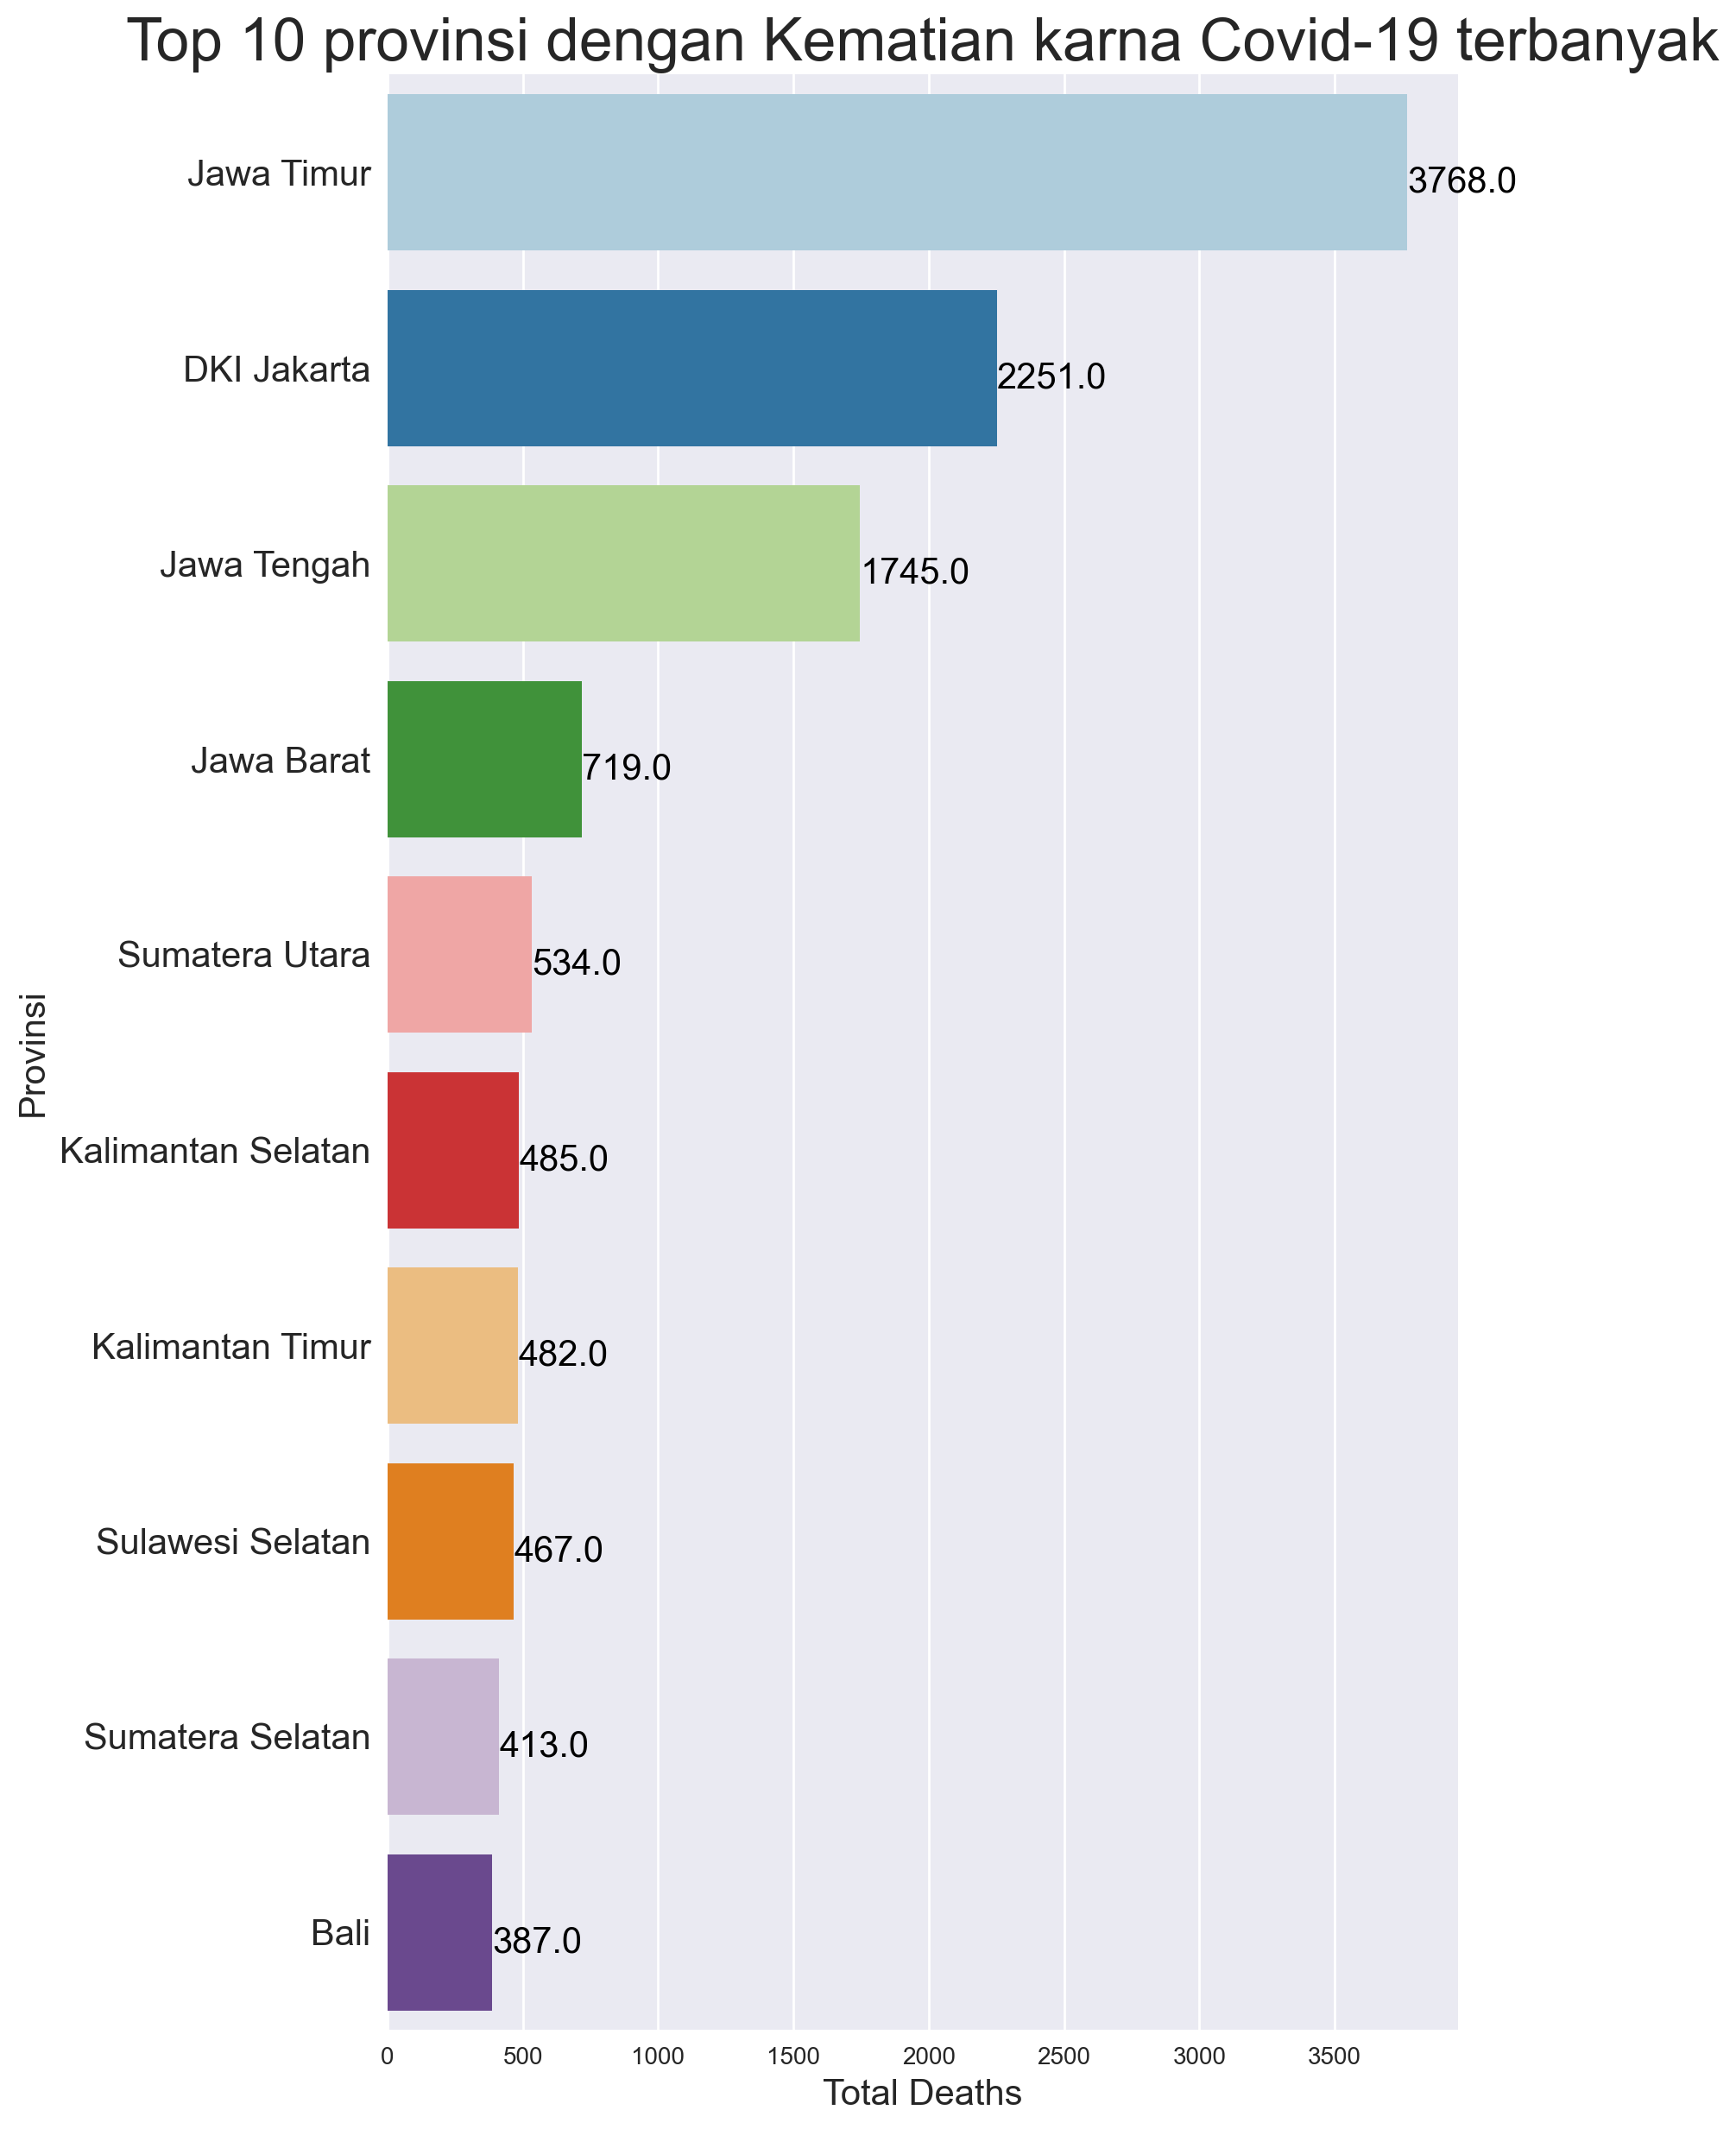

In [17]:
total_death = covid_peta.sort_values(by=['Total Deaths'], ascending=False)
total_death = total_death[0:10]
plt.figure(figsize=(8,15),dpi=200)
ax = sns.barplot(total_death['Total Deaths'], total_death['Provinsi'],palette='Paired')
plt.xlabel("Total Deaths",fontsize = 15)
plt.ylabel("Provinsi",fontsize = 15)
plt.title('Top 10 provinsi dengan Kematian karna Covid-19 terbanyak',fontsize = 25)
ax.set_yticklabels(textwrap.fill(y.get_text()) for y in ax.get_yticklabels())
ax.tick_params(axis="y", labelsize=15)
for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 15, color = 'black')
plt.show()